In [ ]:
import tensorflow as tf
import numpy as np


In [ ]:
x = tf.constant([4,3,2,1,0], dtype=float)
y = tf.sin(x) ** 2

a = tf.random.uniform([])
b = tf.random.uniform([])
c = tf.random.uniform([])
d = tf.random.uniform([])

lr = 0.00005
epochs = 1000000

print(x)
print(y)
print()
print(a)
print(b)
print(c)
print(d)

tf.Tensor([4. 3. 2. 1. 0.], shape=(5,), dtype=float32)
tf.Tensor([0.57275003 0.01991485 0.82682186 0.70807344 0.        ], shape=(5,), dtype=float32)

tf.Tensor(0.11884999, shape=(), dtype=float32)
tf.Tensor(0.7664176, shape=(), dtype=float32)
tf.Tensor(0.5731406, shape=(), dtype=float32)
tf.Tensor(0.9778278, shape=(), dtype=float32)


In [ ]:
for epoch in range(epochs):
    y_pred = a + b*x + c*x**2 + d*x**3
    loss = tf.reduce_mean((y_pred-y)**2)
    gradient = 2.0 * (y_pred - y)
    a_replace = tf.reduce_sum(gradient)
    b_replace = tf.reduce_sum(gradient*x)
    c_replace = tf.reduce_sum(gradient*x**2)
    d_replace = tf.reduce_sum(gradient*x**3)
    a -= a_replace * lr
    b -= b_replace * lr
    c -= c_replace * lr
    d -= d_replace * lr
    if epoch%10000 == 0:
        print("- {}번째 실행\ny_pred : {}\nloss : {}\ngradient : {}\n<replace> {} {} {} {}\n<weight> {} {} {} {}\n".format(
        epoch, y_pred, loss, gradient, a_replace, b_replace, c_replace, d_replace, a, b, c, d
        ))    

- 0번째 실행
y_pred : [74.935745   33.97772    11.7668705   2.436236    0.11884999]
loss : 1361.134765625
gradient : [148.726       67.9156      21.880096     3.456325     0.23769999]
<replace> 242.21572875976562 845.8673095703125 3081.833251953125 11530.6826171875
<weight> 0.10673920810222626 0.7241242527961731 0.4190489649772644 0.40129369497299194

- 10000번째 실행
y_pred : [0.44014692 0.4332353  0.5167326  0.4898641  0.15185422]
loss : 0.07104954123497009
gradient : [-0.26520622  0.82664084 -0.6201786  -0.43641865  0.30370843]
<replace> -0.19145417213439941 -0.25767815113067627 0.27933549880981445 -0.051741600036621094
<weight> 0.15186378359794617 0.5605185627937317 -0.25597232580184937 0.03346513956785202

- 20000번째 실행
y_pred : [0.46067595 0.38079298 0.5214591  0.5648773  0.1932512 ]
loss : 0.058778245002031326
gradient : [-0.22414815  0.7217562  -0.6107255  -0.28639233  0.3865024 ]
<replace> -0.013007402420043945 -0.23916733264923096 0.18014097213745117 -0.03026103973388672
<weight> 0.19

KeyboardInterrupt: ignored

In [5]:
# 모델의 가중치
a = -0.03599422797560692
b = 1.7893508672714233
c = -1.0588650703430176
d = 0.16180163621902466

result_y = [0 for i in range(101)]

for x in range(100):
    y_pred_test = a + b*x + c*x**2 + d*x**3
    result_y[x] = y_pred_test

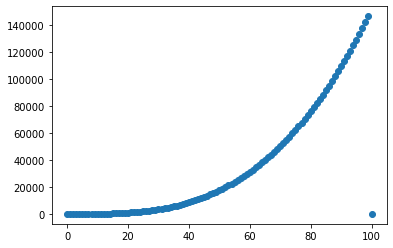

In [6]:
import matplotlib.pyplot as plt

plt.scatter(range(101), result_y)